In [2]:
!nvidia-smi

Sun May  4 08:49:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import Image

In [6]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov11:: 100%|██████████| 6472/6472 [00:02<00:00, 3004.65it/s]


In [4]:
dataset.location

'/content/PPE_Detection-2'

In [5]:
!yolo task=detect mode=train data={dataset.location}/data.yaml  model=yolo11n.pt  epochs=20  imgsz=640

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE_Detection-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

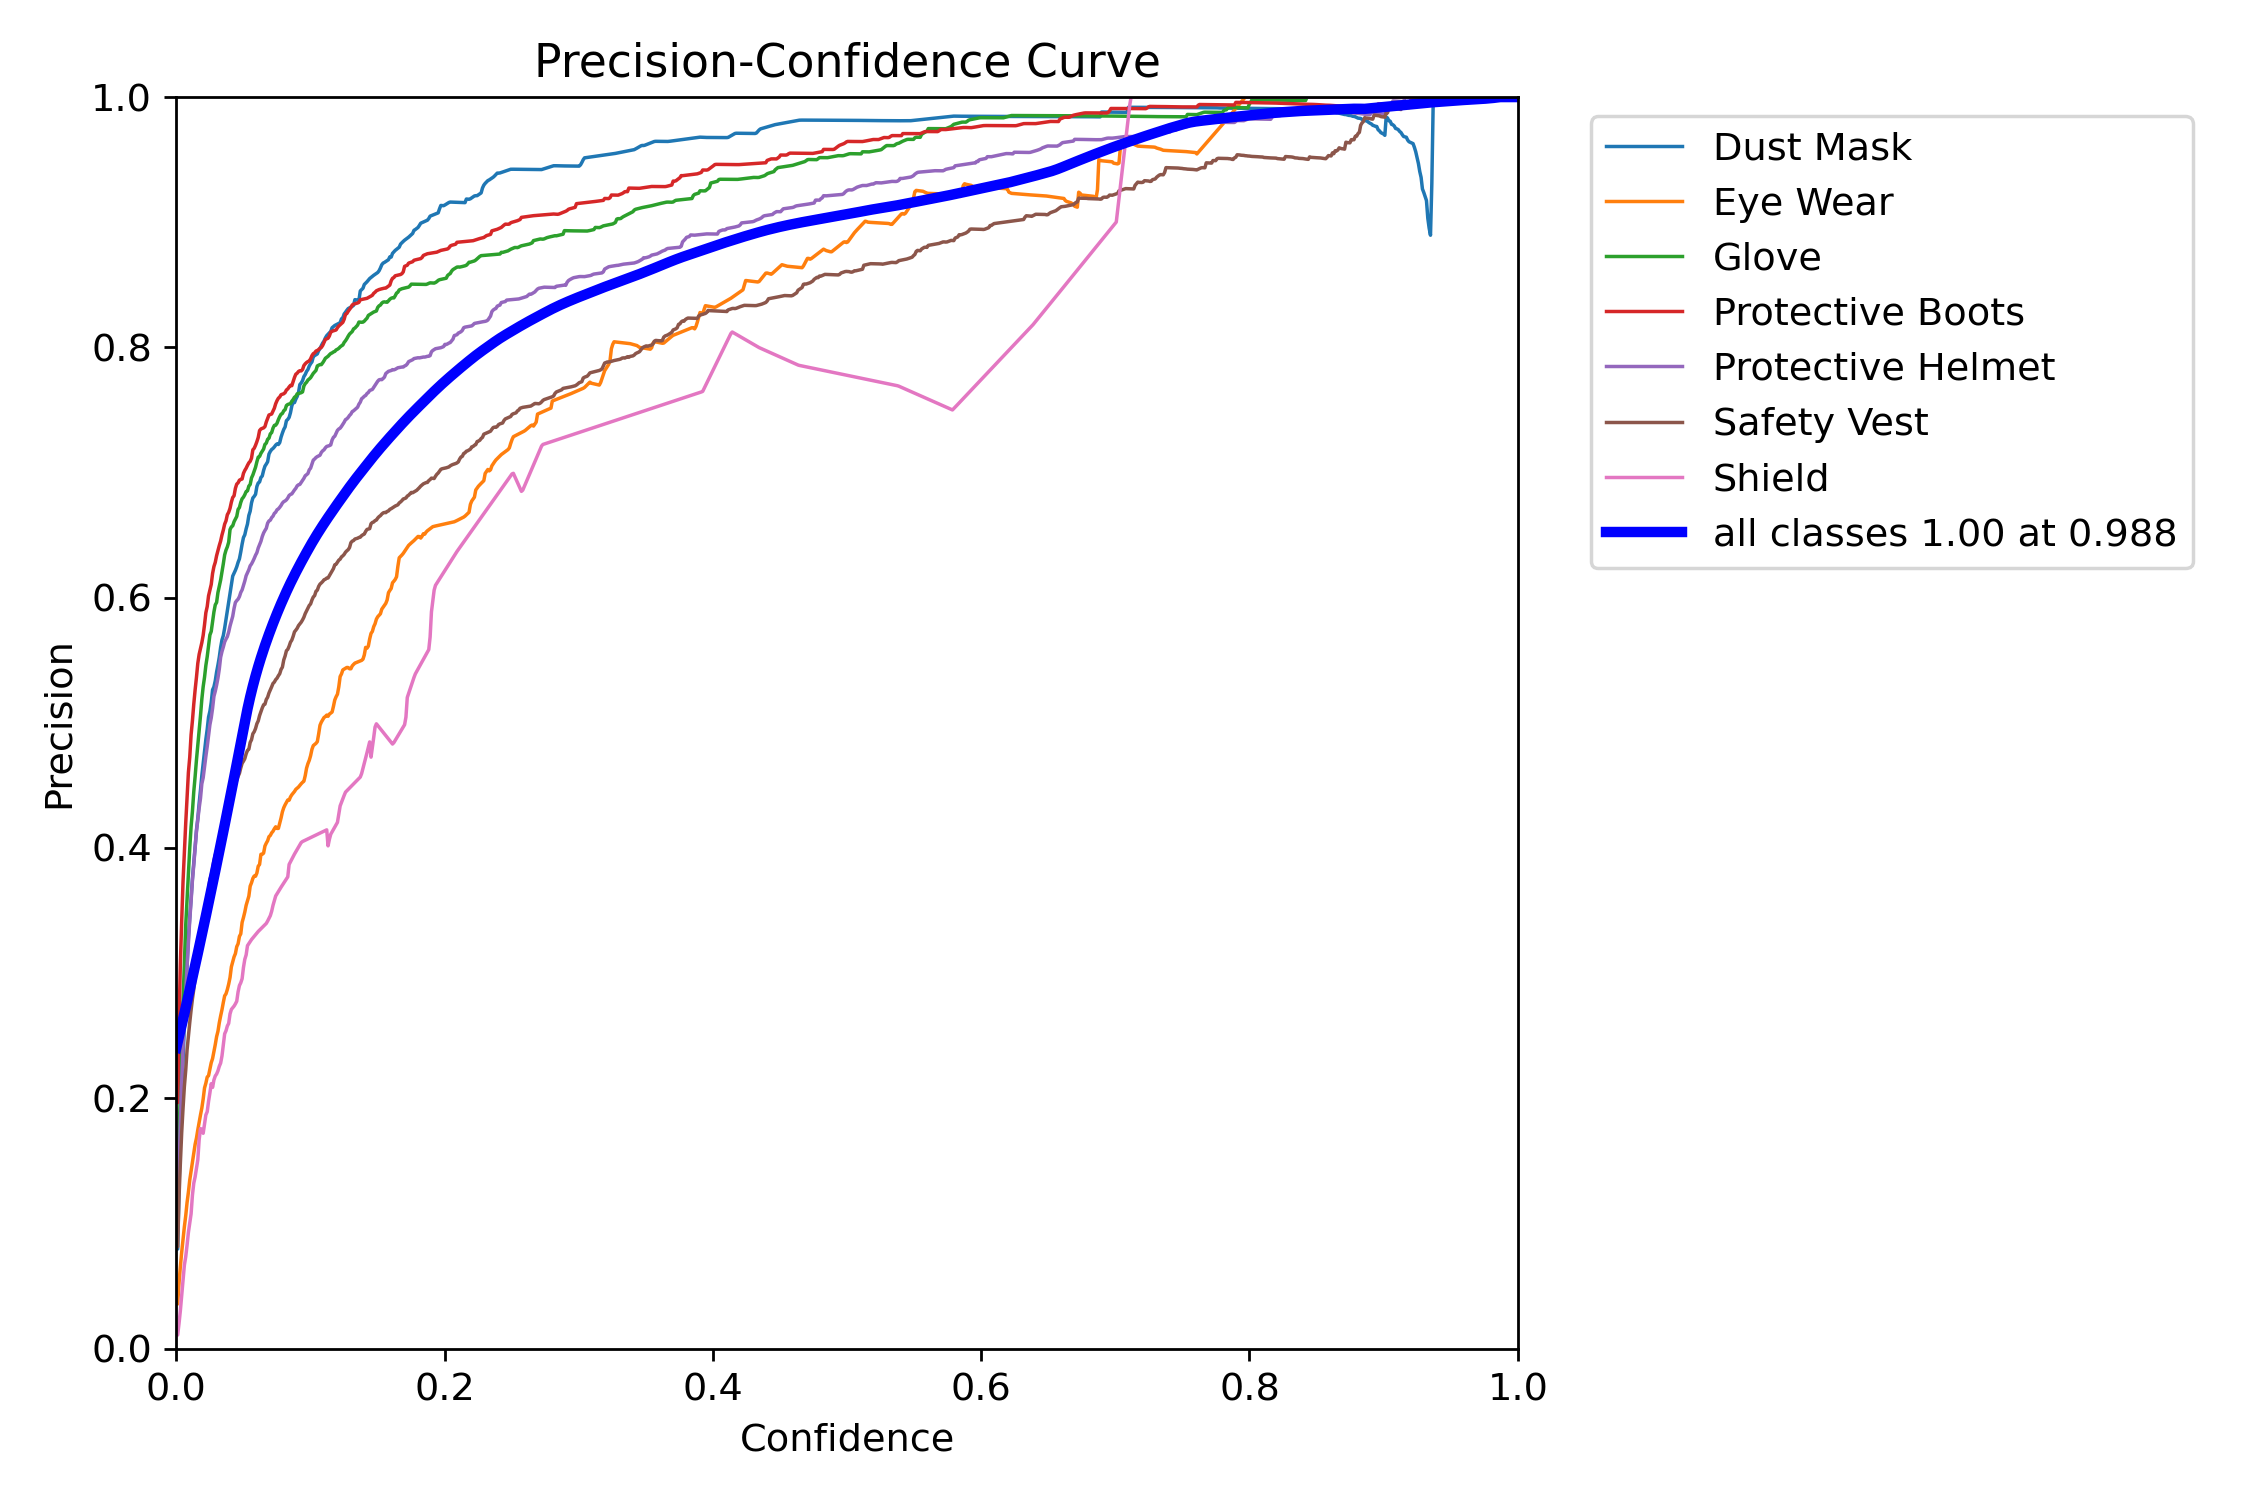

In [8]:
Image("/content/runs/detect/train/P_curve.png", width=600)

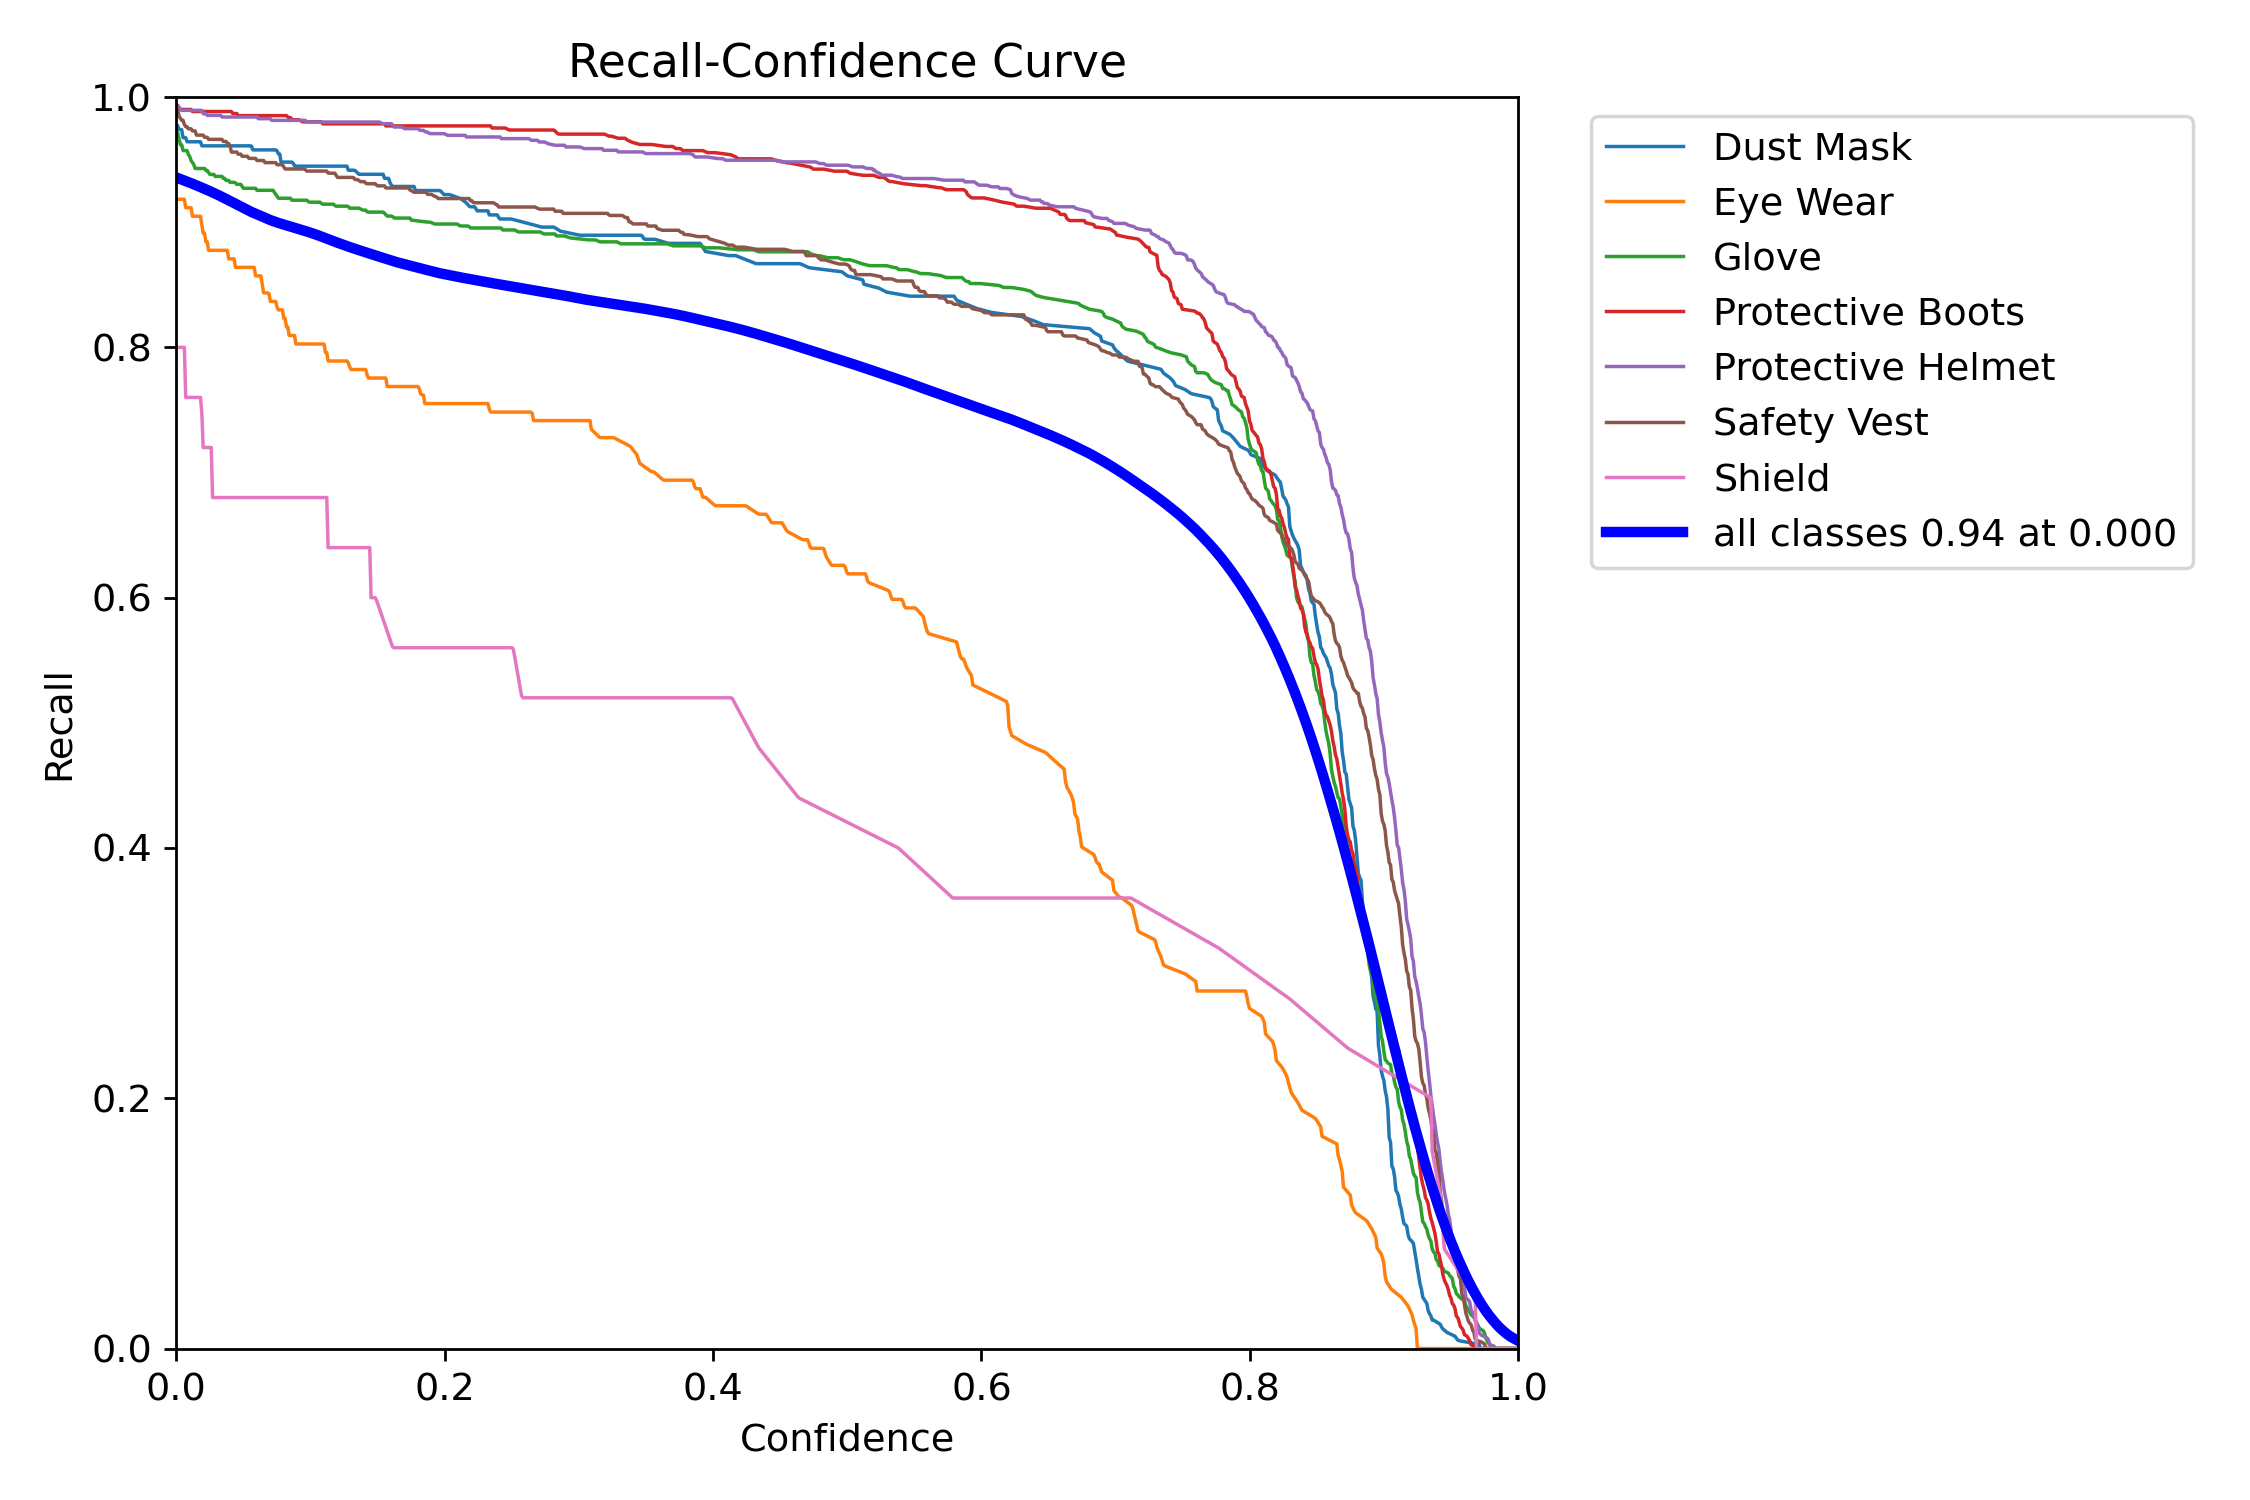

In [9]:
Image("/content/runs/detect/train/R_curve.png", width=600)

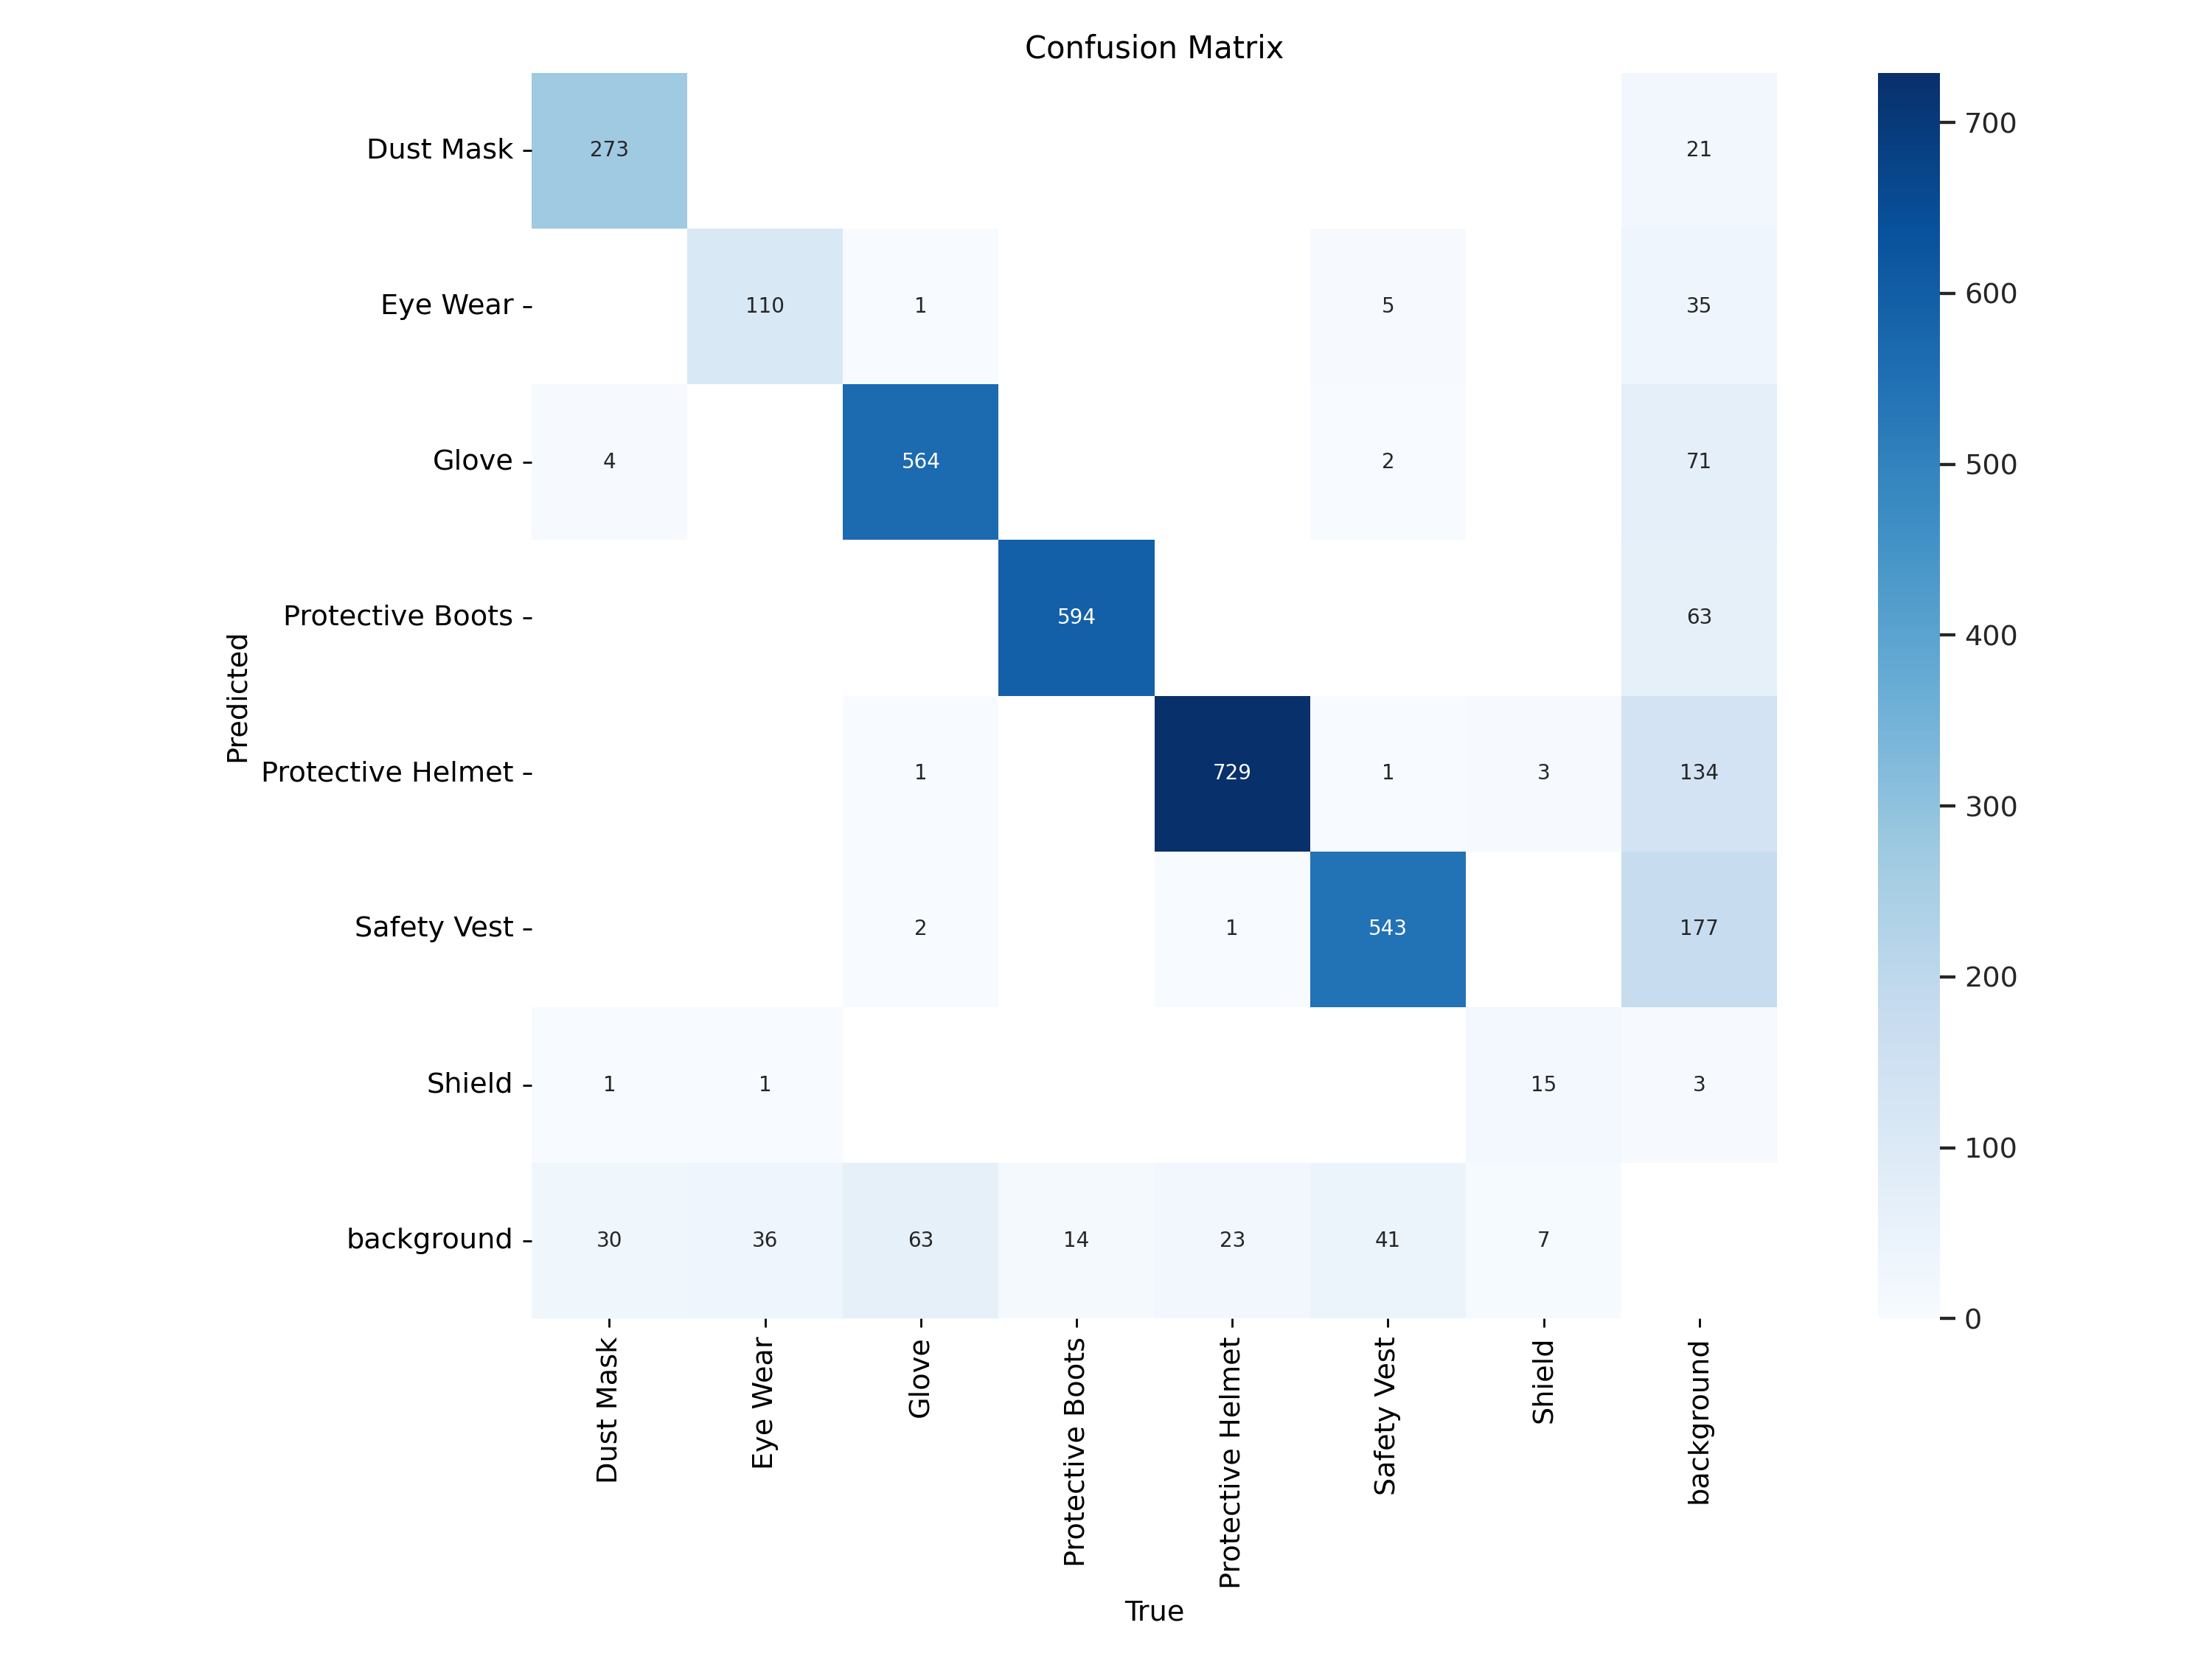

In [10]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

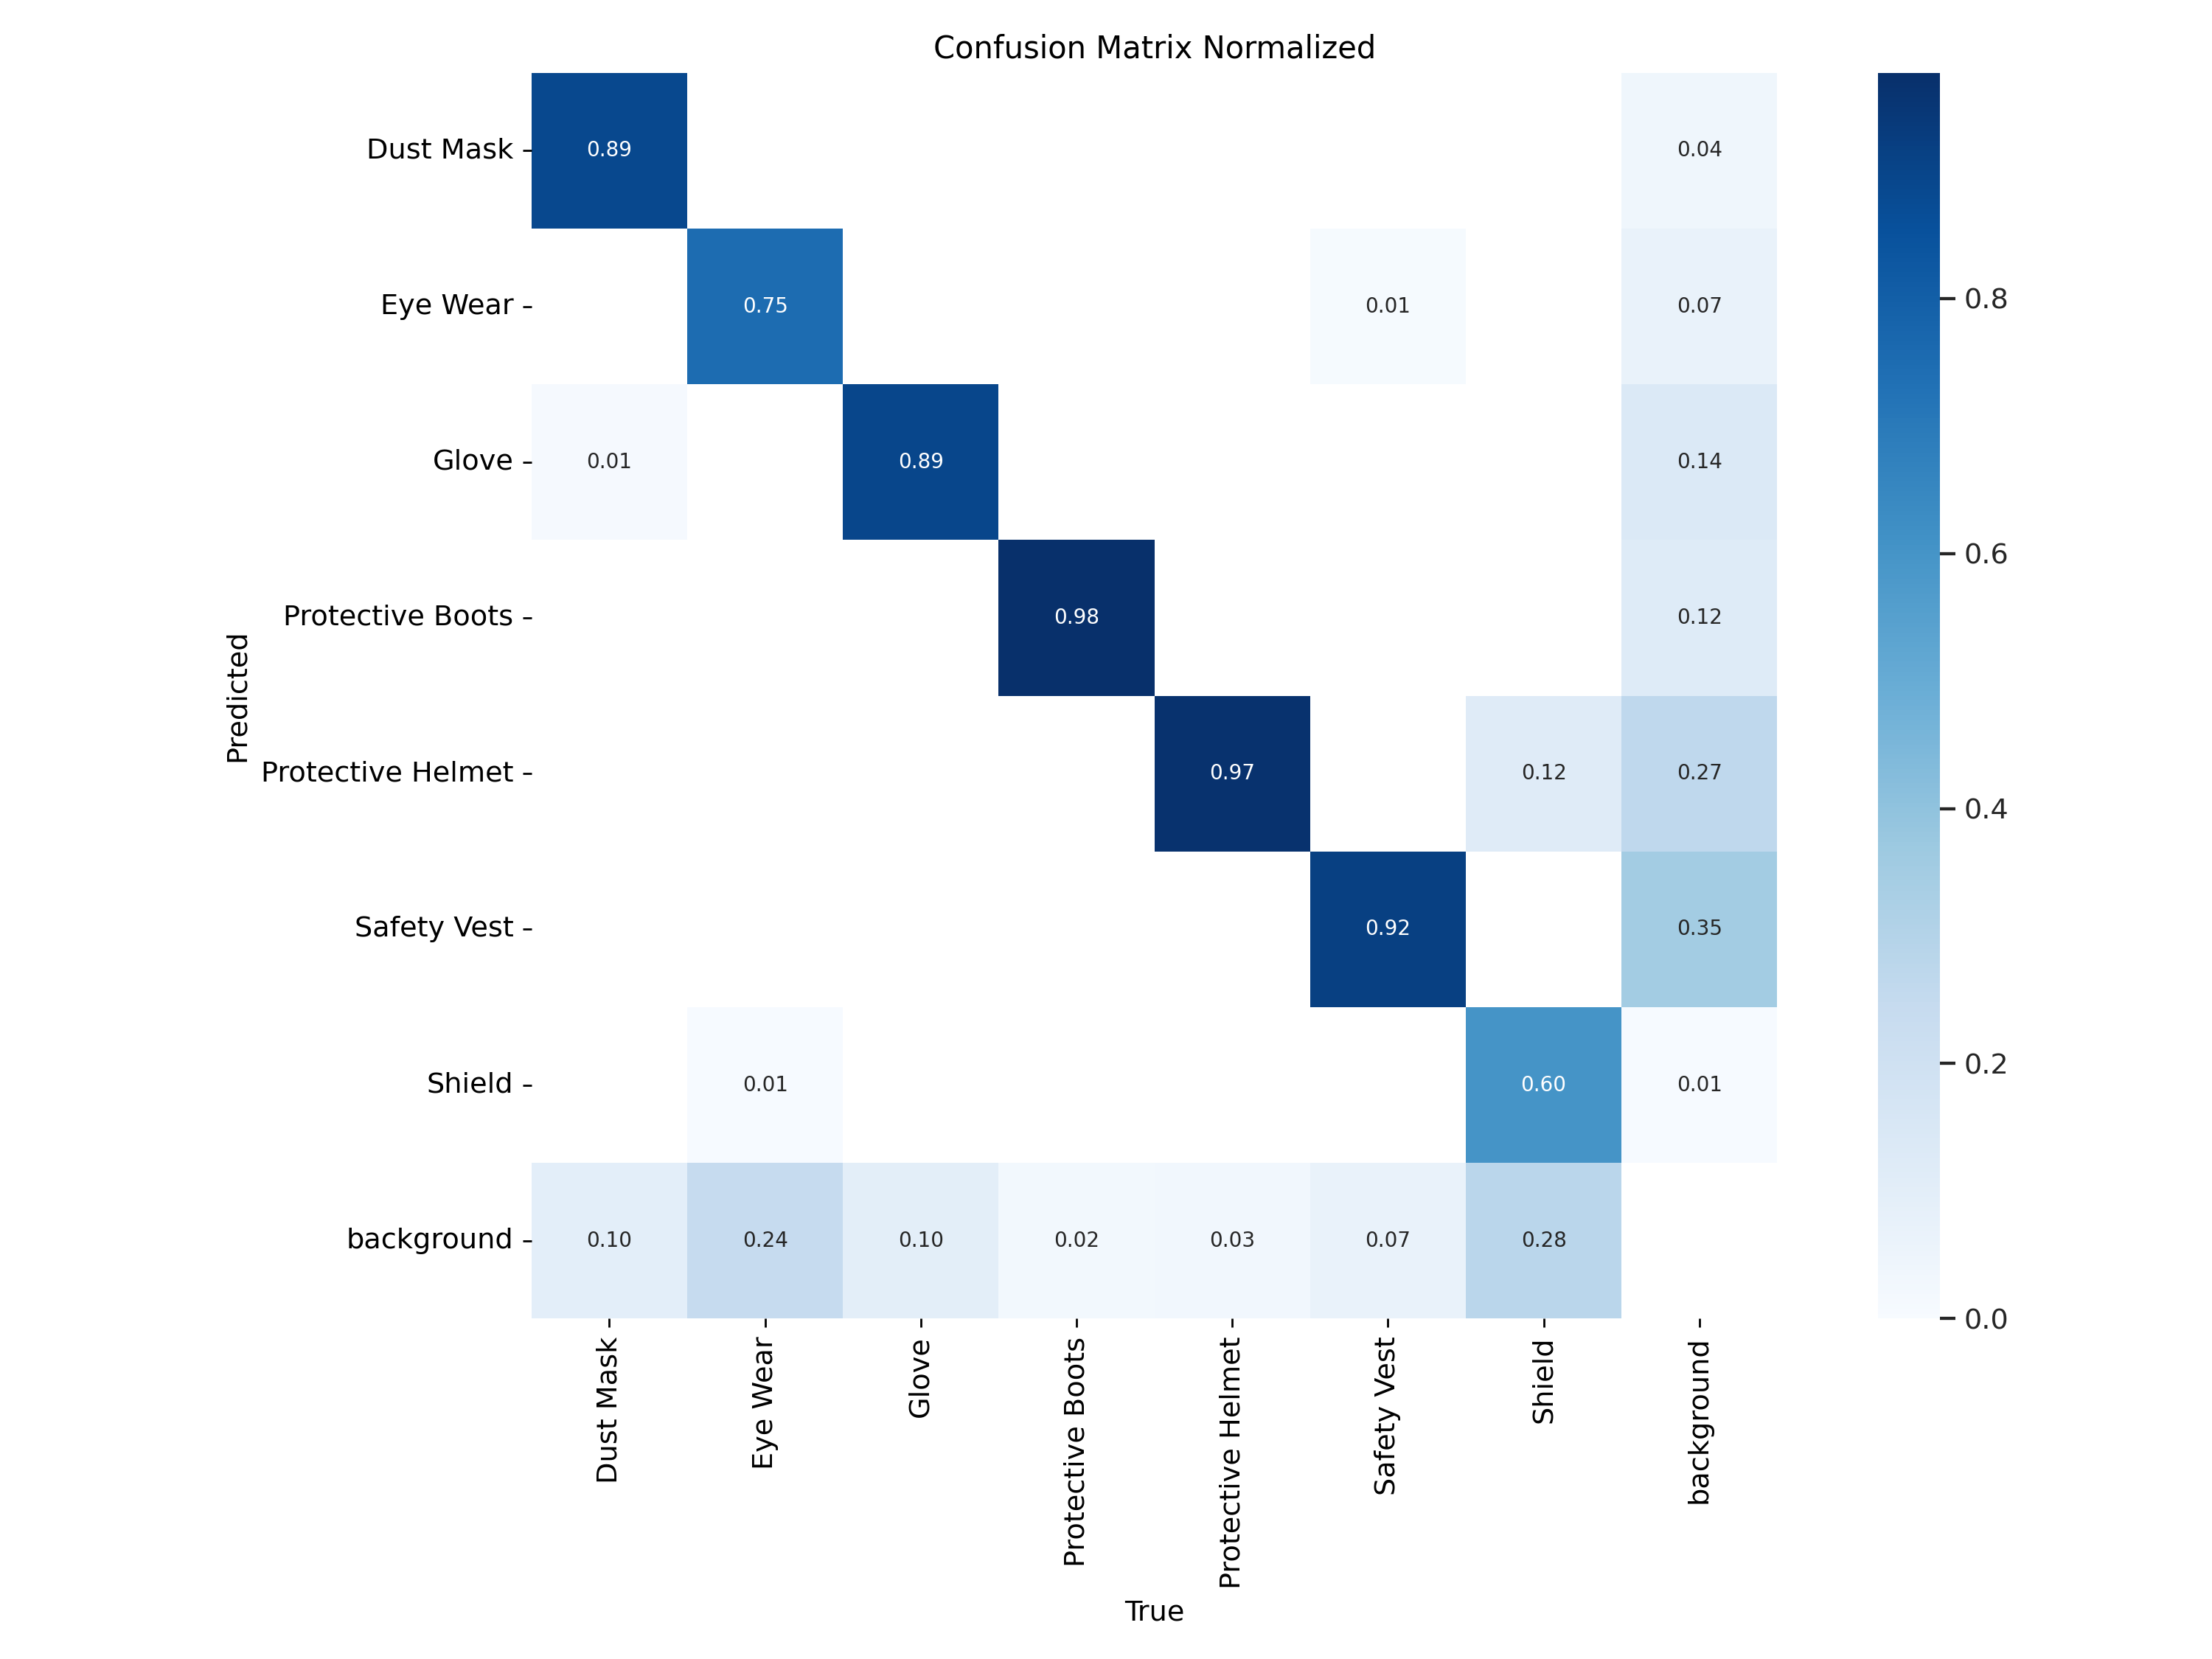

In [11]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

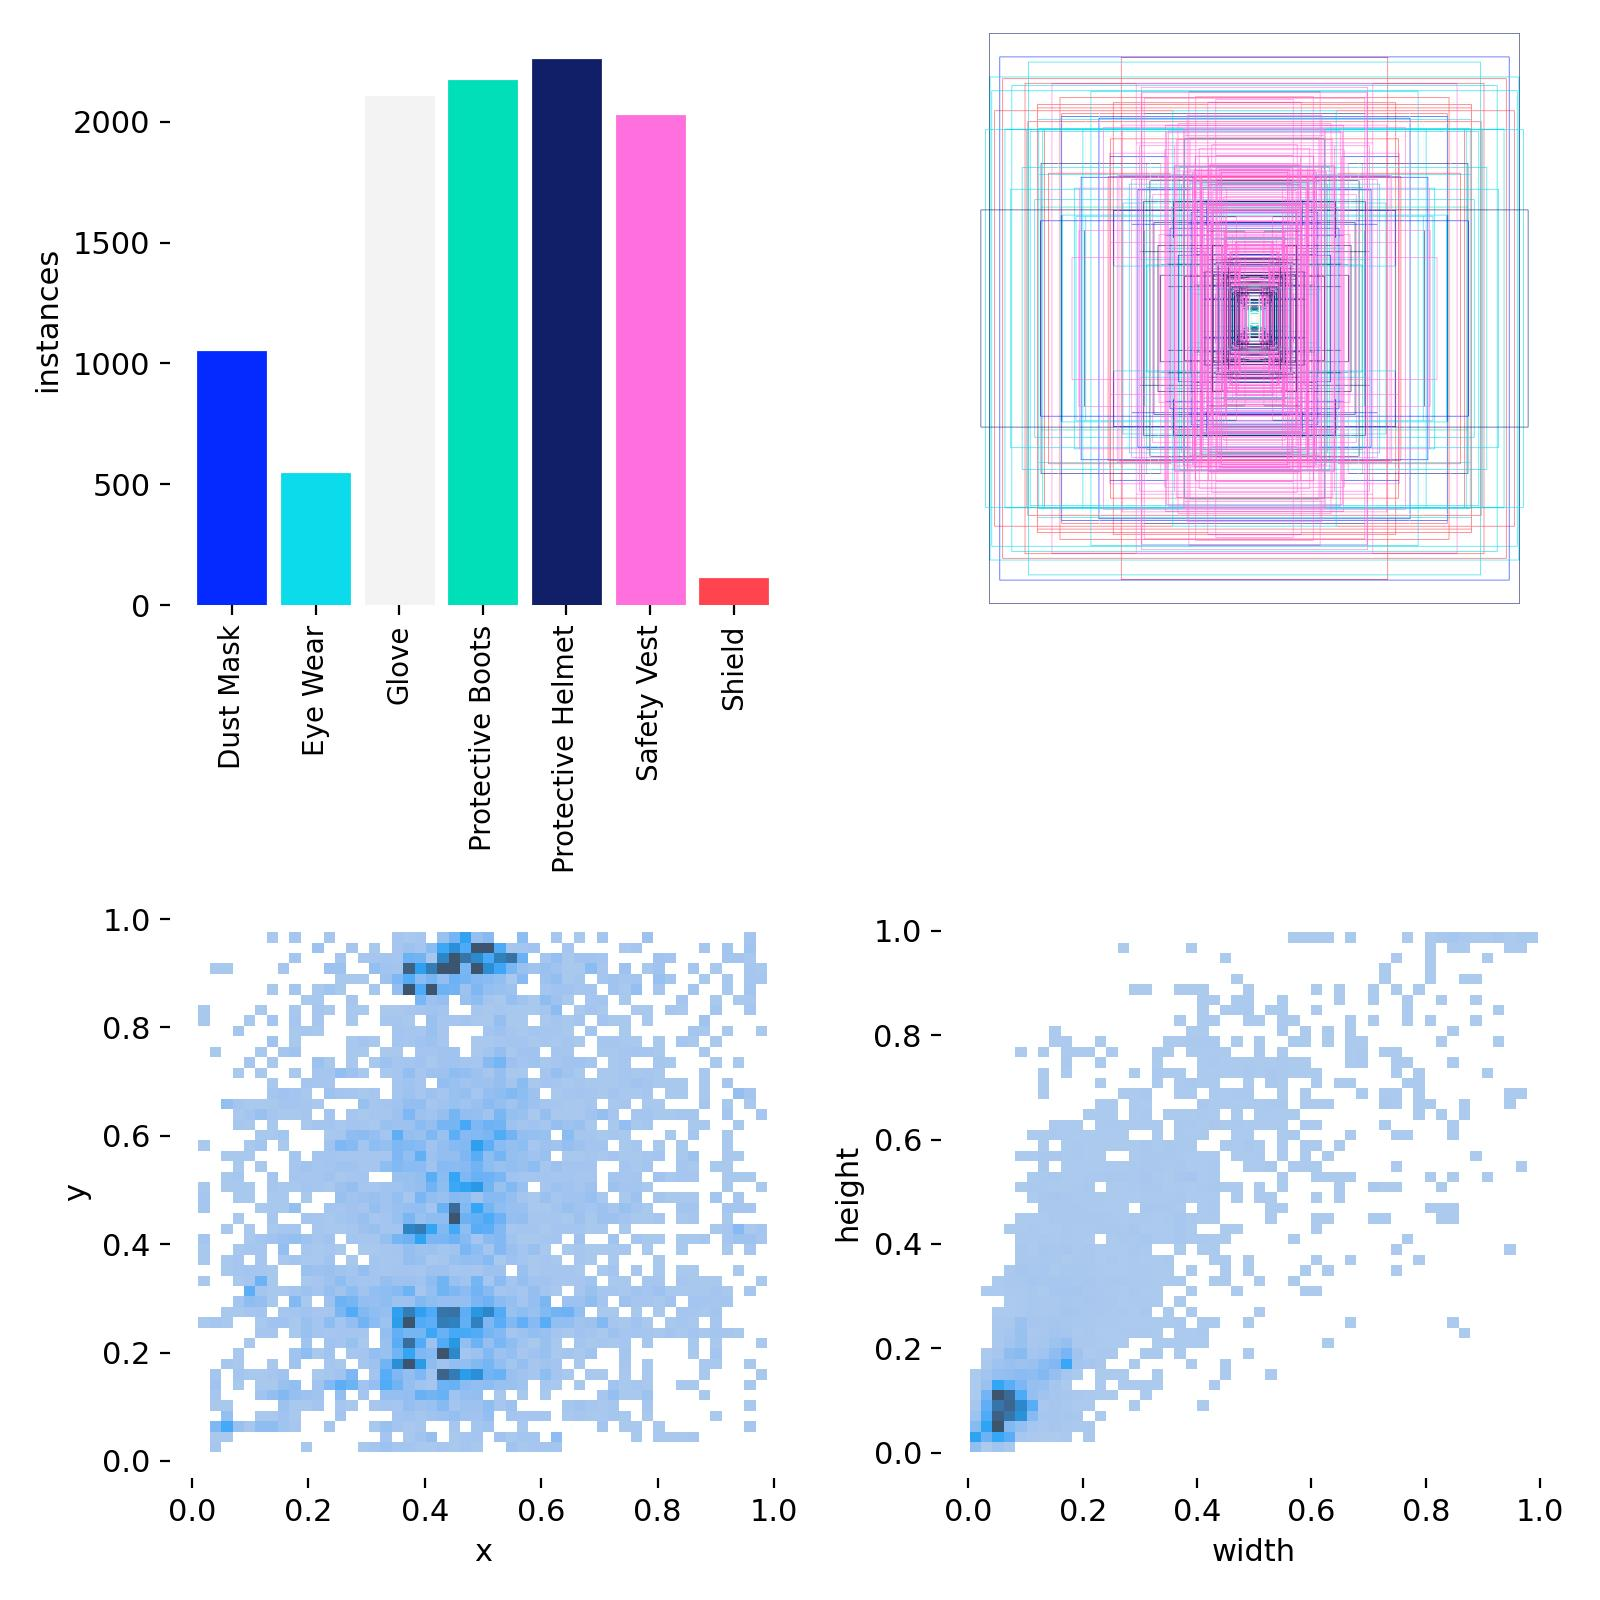

In [14]:
Image("/content/runs/detect/train/labels.jpg", width=600)

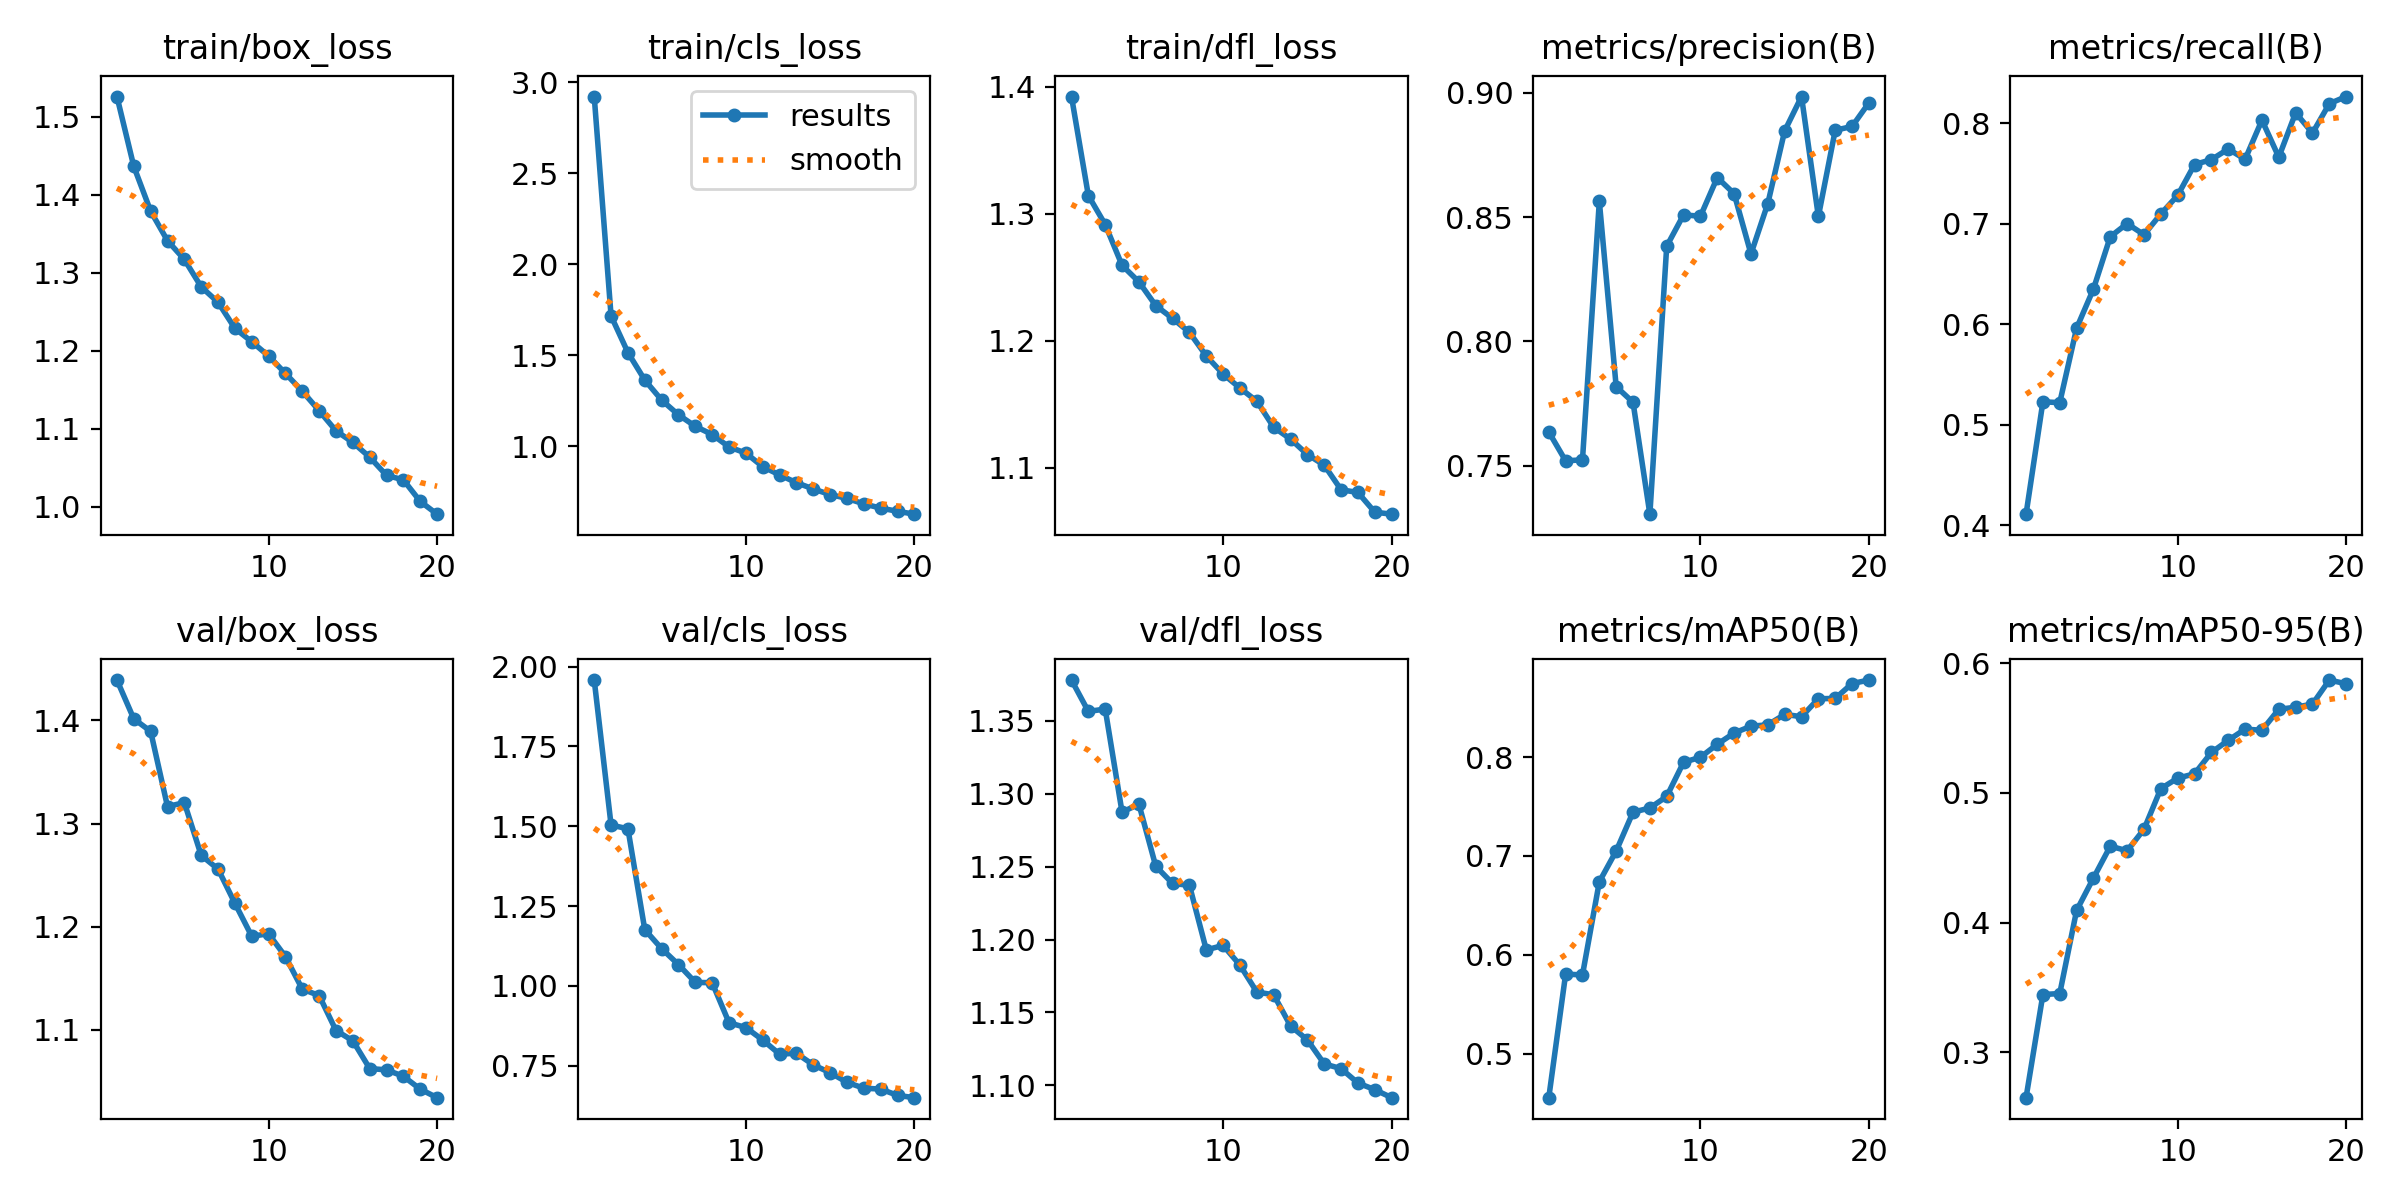

In [15]:
Image("/content/runs/detect/train/results.png", width=600)

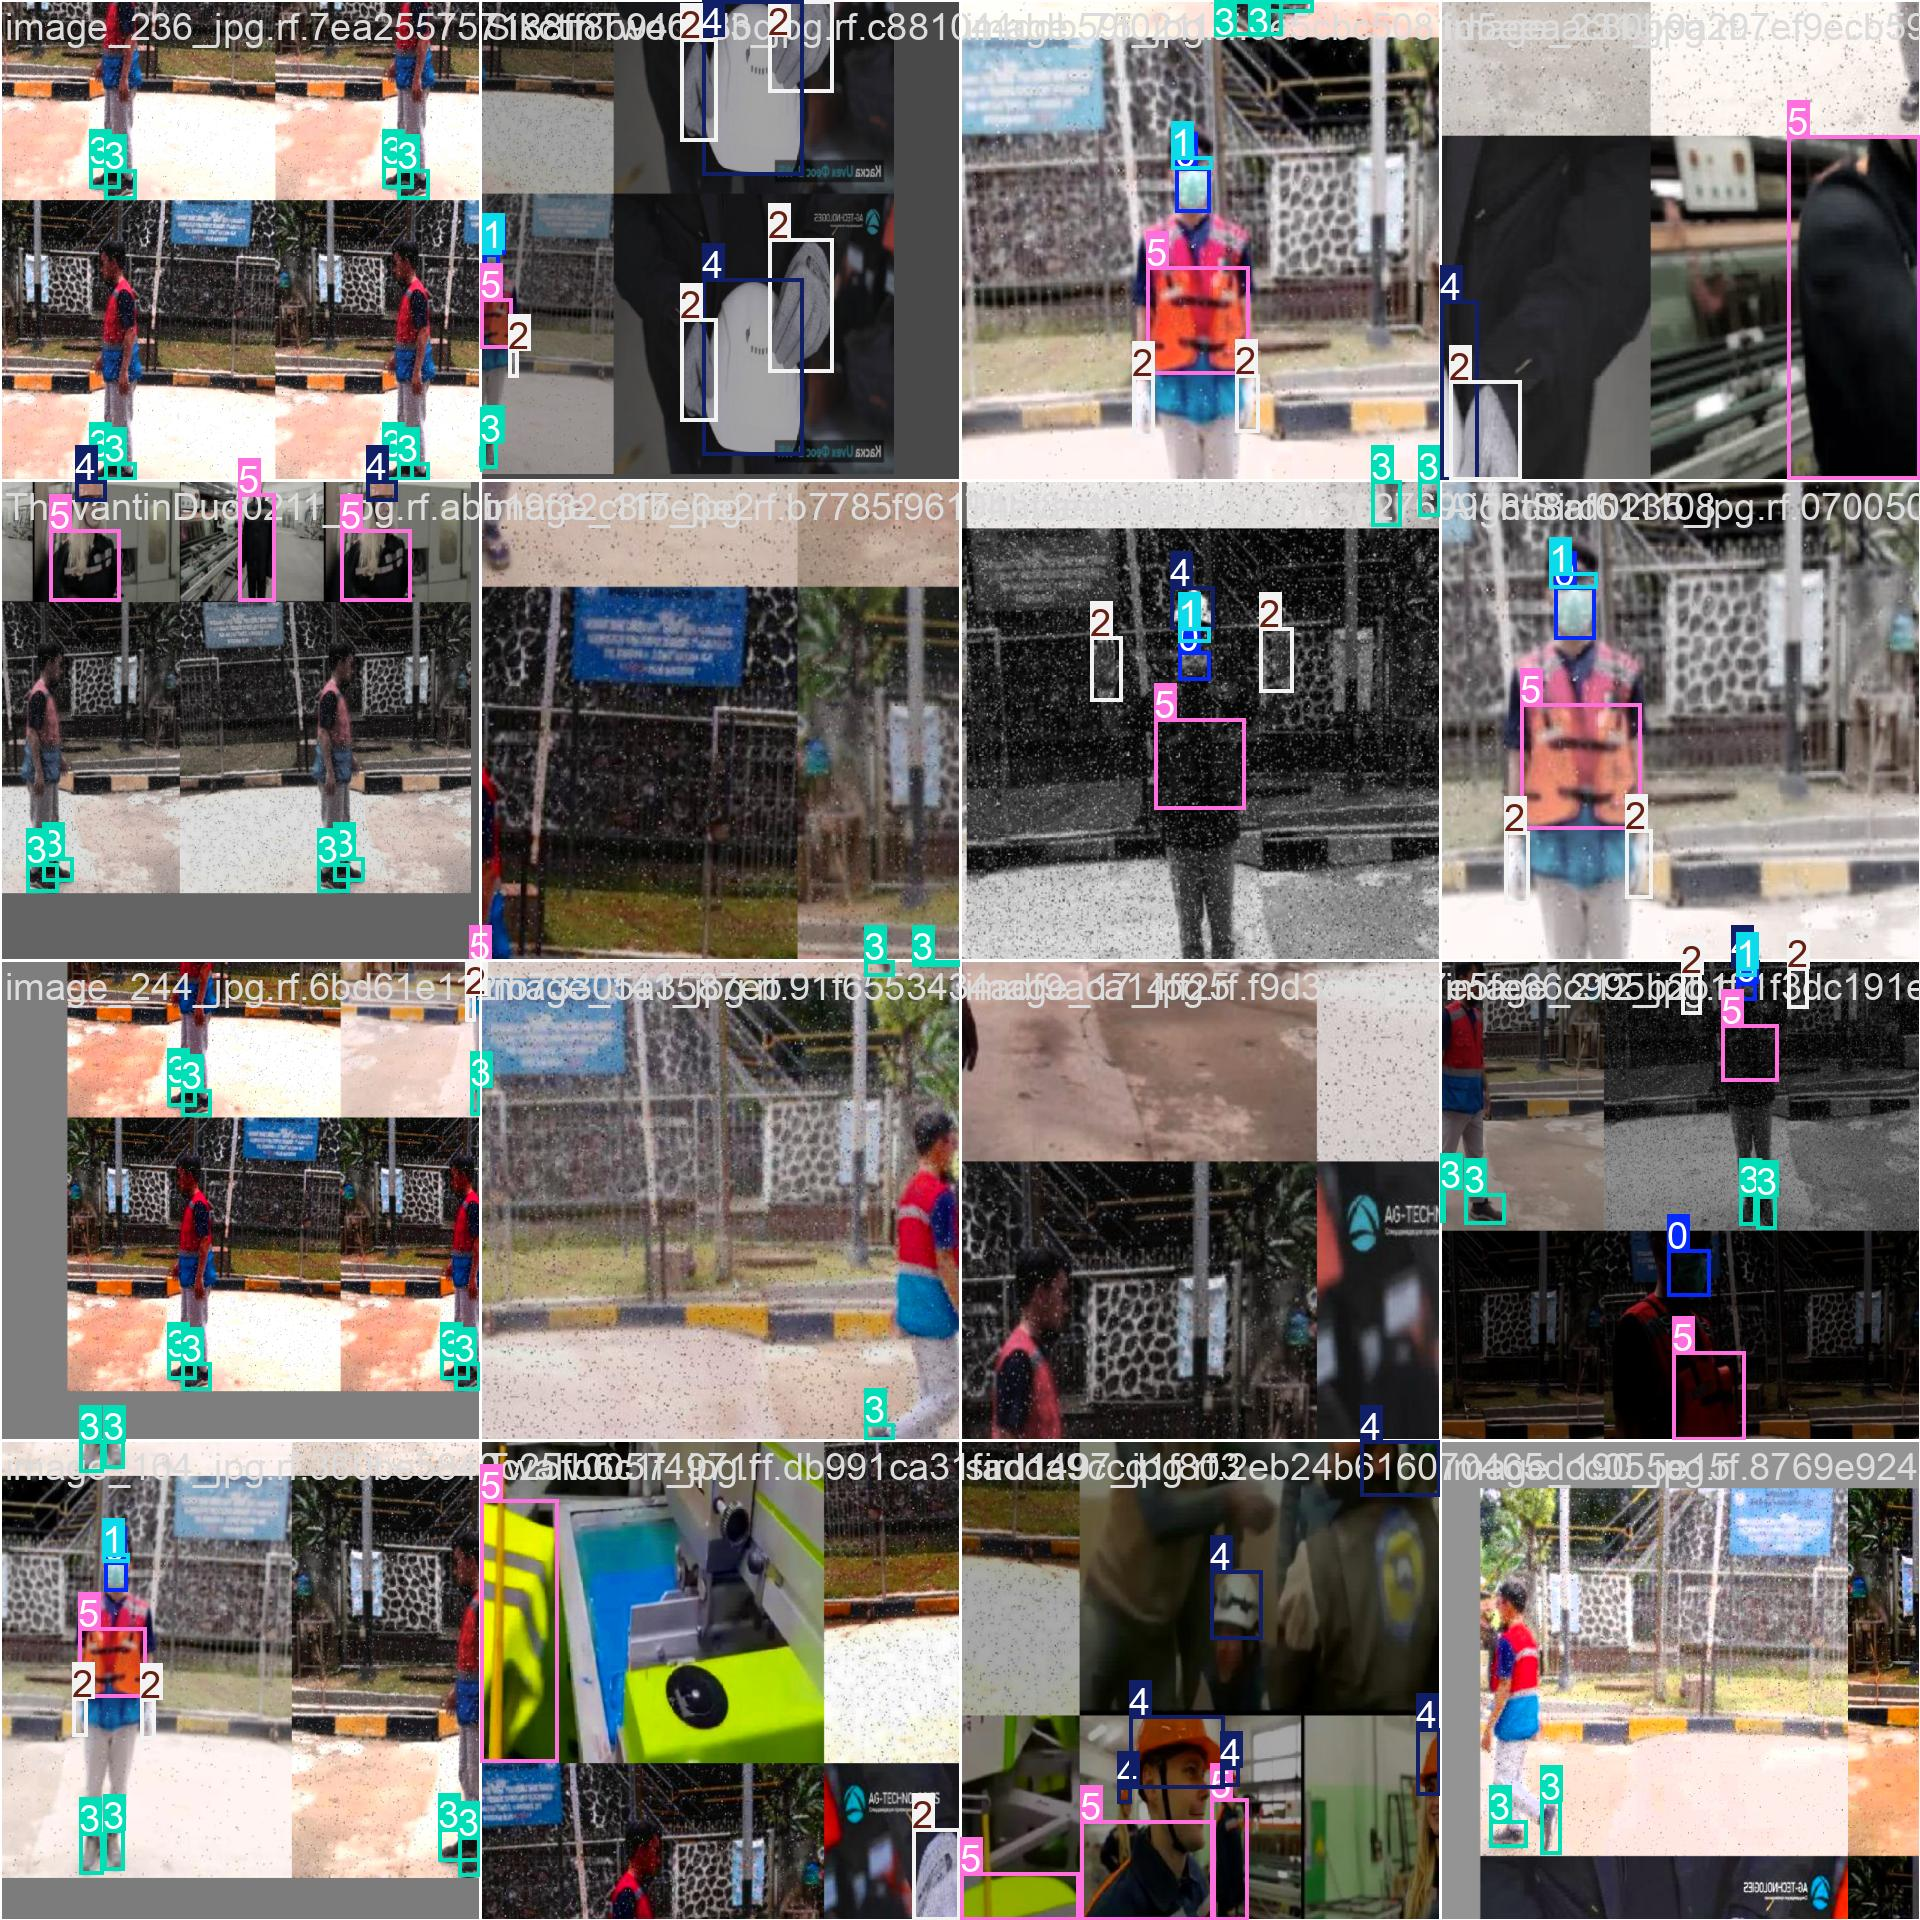

In [16]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

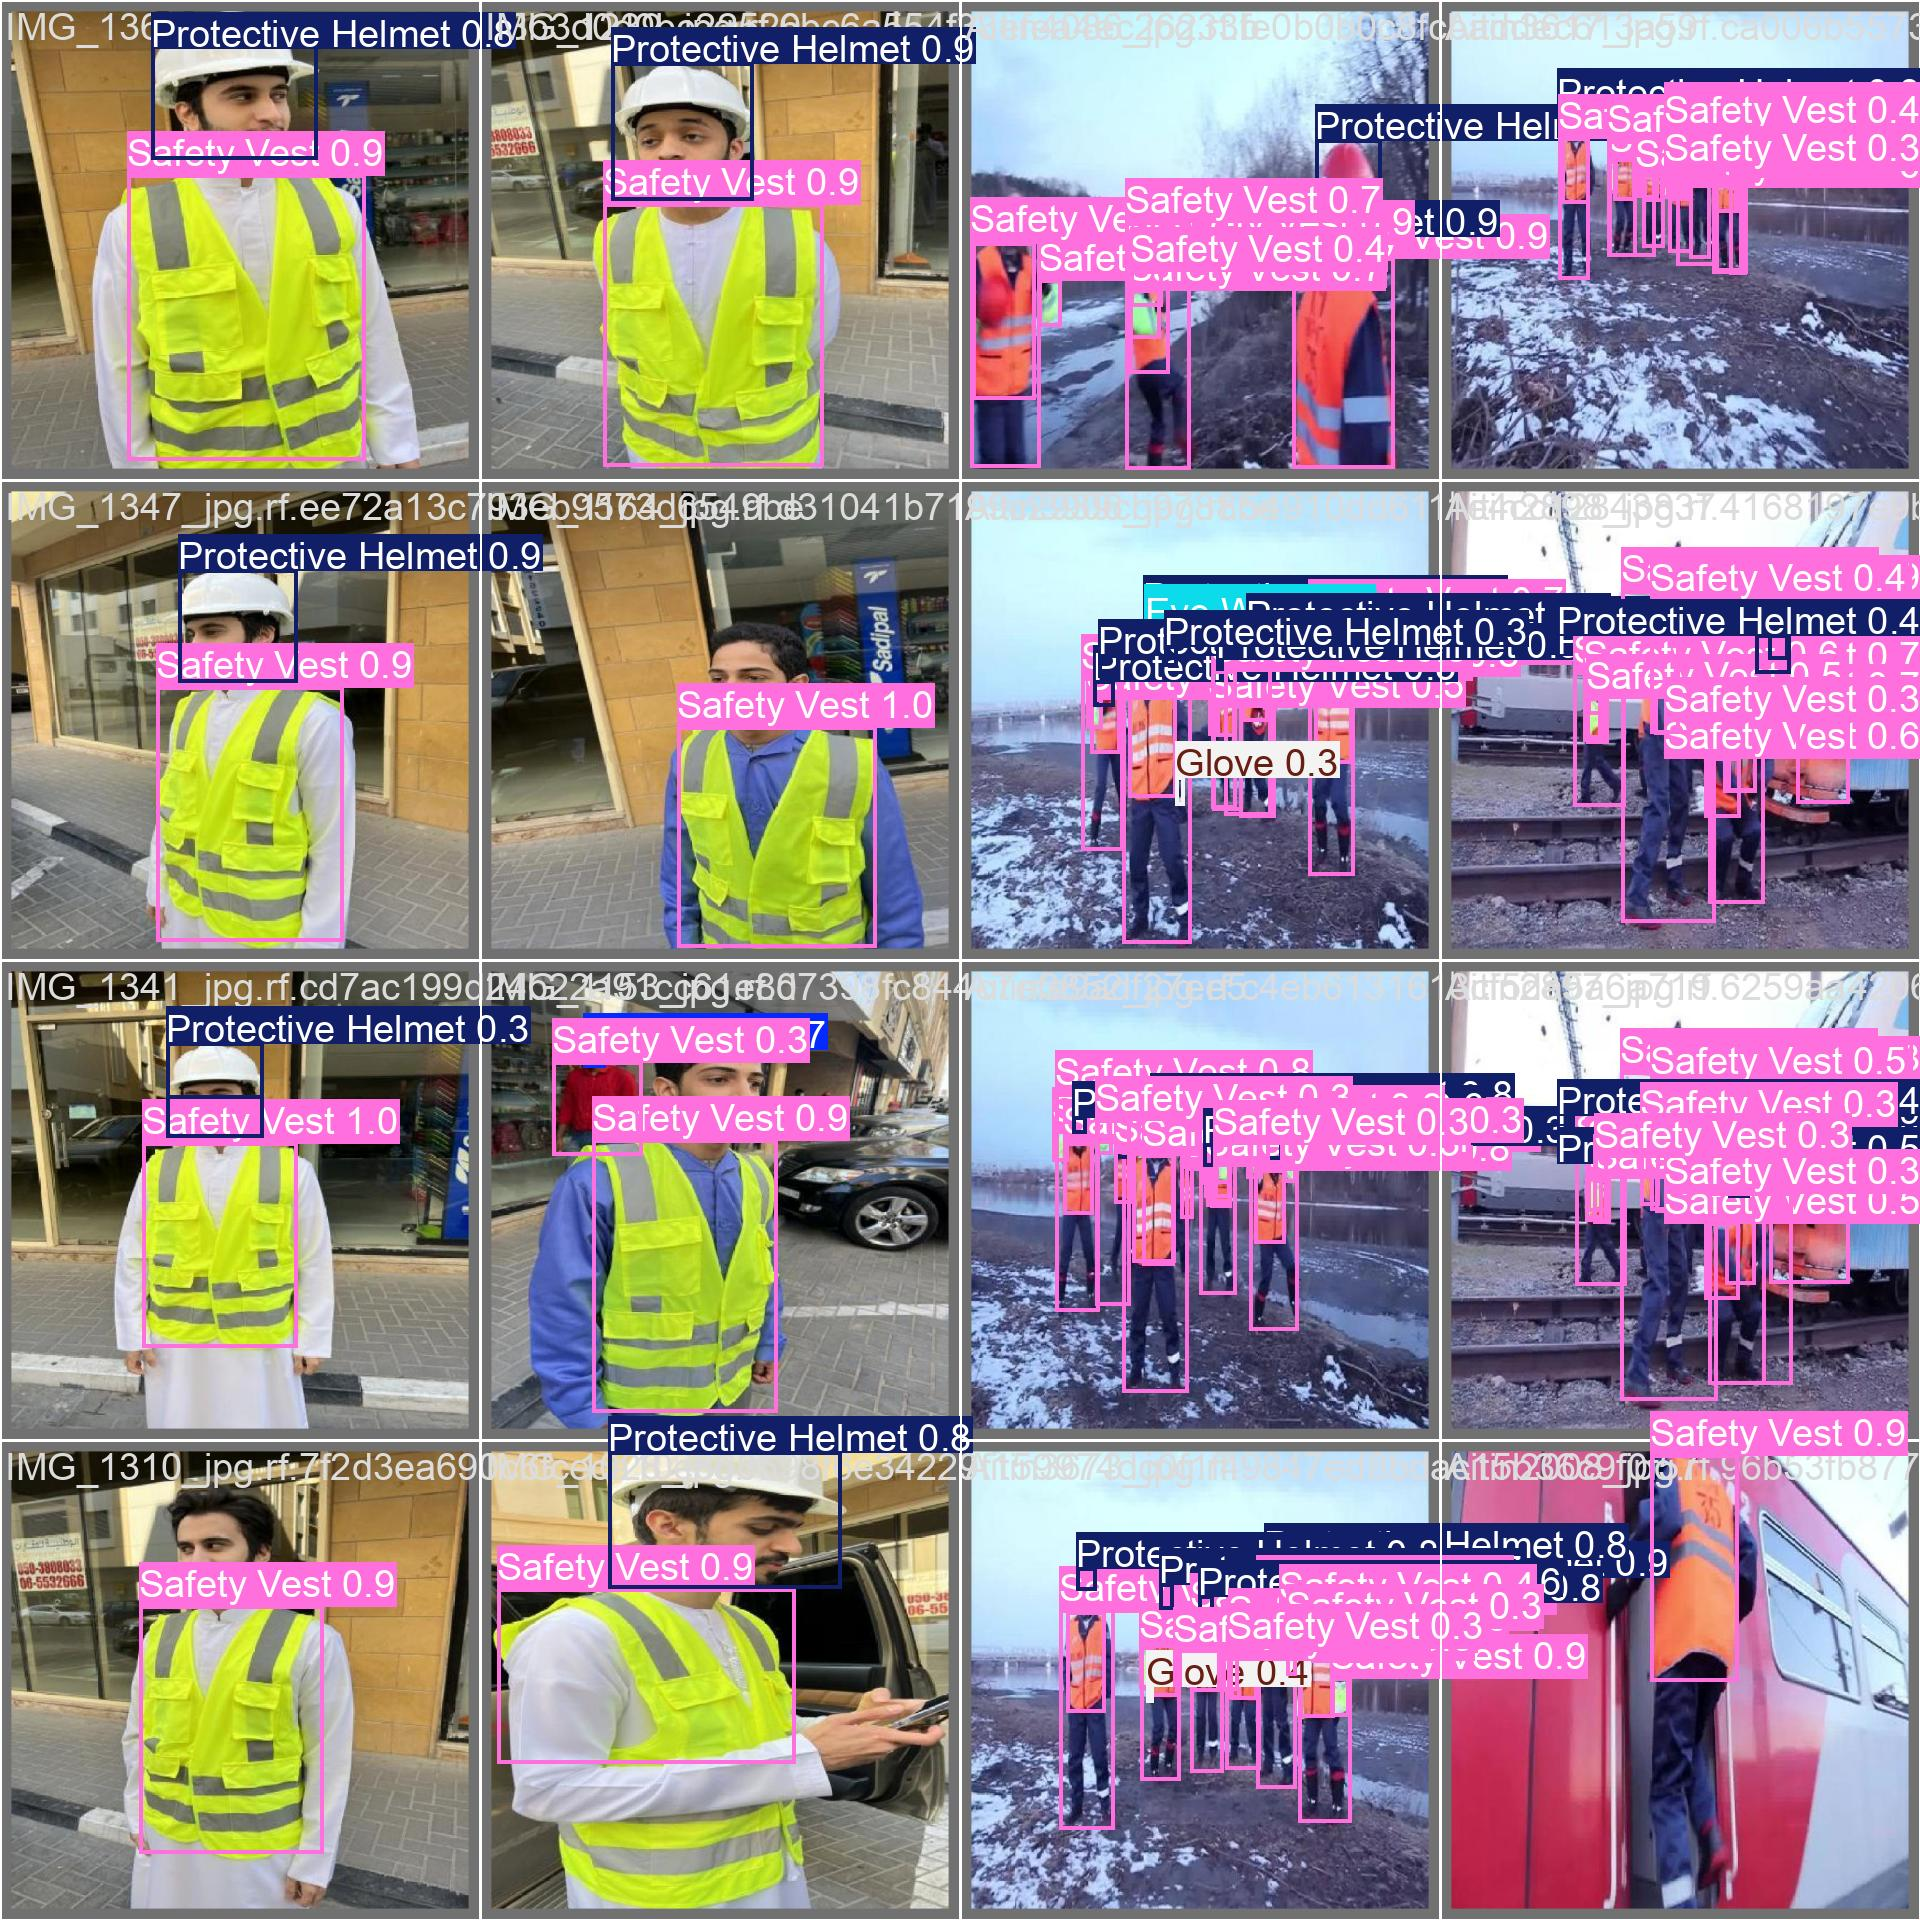

In [18]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [19]:
!mv /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/yolo11-weights

In [21]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1183.5±484.6 MB/s, size: 57.9 KB)
val: Scanning /content/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100% 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:07<00:00,  5.02it/s]
                   all        637       3064      0.885      0.819      0.874      0.587
             Dust Mask        299        308      0.971      0.875      0.949      0.636
              Eye Wear        146        147      0.833      0.673      0.776       0.43
                 Glove        346        631      0.934       0.88      0.936      0.648
      Protective Boots        298        608      0.946      0.954      0.979      0.682
     Protective Helmet        403        753      

In [22]:
!yolo task=detect mode=predict model=best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/322 /content/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 1 Protective Helmet, 13.4ms
image 2/322 /content/PPE_Detection-2/test/images/20220721_161946_jpg.rf.905c375aa964159f9edab2a55a6e7476.jpg: 640x640 (no detections), 9.2ms
image 3/322 /content/PPE_Detection-2/test/images/20220721_162015_jpg.rf.ccb5d8a5aed0bb50c04431fa0b0d5479.jpg: 640x640 1 Glove, 8.6ms
image 4/322 /content/PPE_Detection-2/test/images/20220721_162036_jpg.rf.2664c2f59604cd2380a51fd174055a7e.jpg: 640x640 1 Dust Mask, 1 Glove, 8.2ms
image 5/322 /content/PPE_Detection-2/test/images/20220721_162308_jpg.rf.913971a6c64f38eabc6b69bab4409b46.jpg: 640x640 (no detections), 8.3ms
image 6/322 /content/PPE_Detection-2/test/images/20220721_162435_jpg.rf.d478427044384d4e32ba0c25b15b720d.jpg: 640x640 1 Eye Wear, 1 Shi

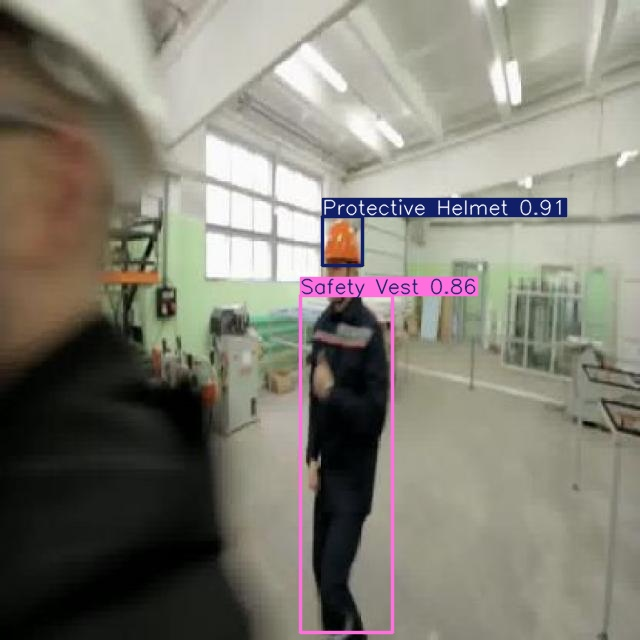

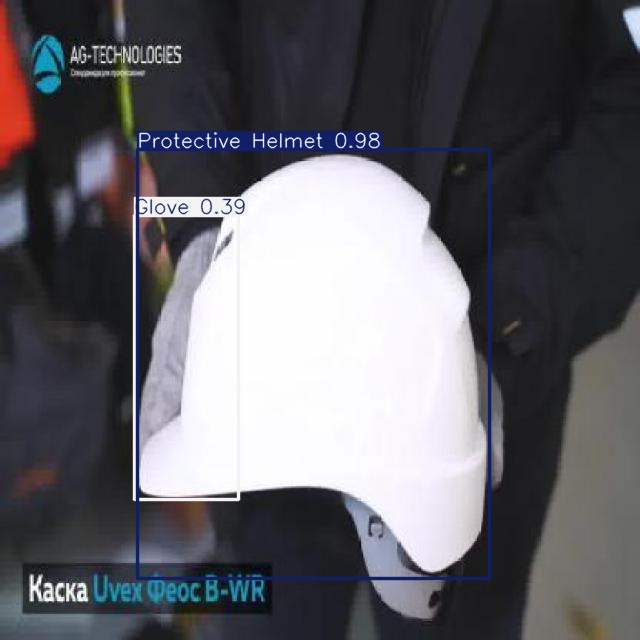

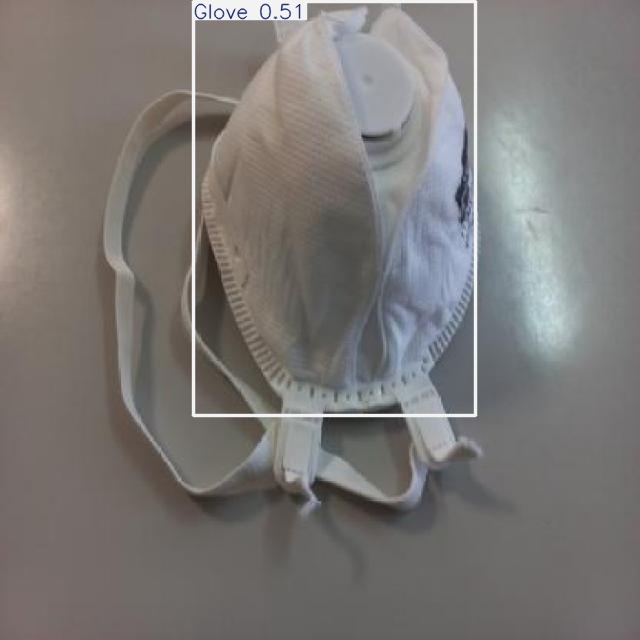

In [23]:
import glob
import os
from IPython.display import Image as IPyImage, display
latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img, width=600))
  print("\n")